$$UNIVERSIDAD\hspace{1mm} AUTÓNOMA\hspace{1mm} DE\hspace{1mm} NUEVO\hspace{1mm} LEÓN $$$$Facultad\hspace{1mm}  de\hspace {1mm}Ciencias\hspace{1mm} Físico-Matemáticas $$$$Minería\hspace{1mm}de\hspace{1mm}Datos$$$$\hspace{1mm}$$


# PREPARACION DE DATOS
### _World Happiness Report_


**GLORIA NOHEMI MARTINEZ JIMENEZ 1805800**

**MIGUEL ALEJANDRO NORIEGA ORTEGA 1798528**

**TANIA SARAHI ROSSEL CASTILLO 1810461**

In [50]:
import pandas as pd

Primeramente llamamos a la base de datos para prepararla y trabajar de una forma mas eficiente 

In [51]:
df = pd.read_csv("2016.csv")

El tamaño de nuestra base de datos.

In [52]:
df.shape

(157, 13)

Mostramos las primeras lineas de nuestra base de datos original 

In [53]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Comenzamos a añadir una columna y borrar las que no necesitamos 

In [54]:
df['Happiness score ajustado']= df['Happiness Score']-df['Dystopia Residual']
df.drop(['Upper Confidence Interval','Happiness Rank','Lower Confidence Interval','Dystopia Residual'],axis = 1, inplace= True)

Notamos que no es posible eliminar y conservar varias columnas solamente con el codigo visto en clase, por lo que investigando llegamos a ver que si agregamos [] entre las columnas a eliminar se realizan en un solo movimiento y ademas agregando "inplace=True" aseguramos que se conservara la tabla con las columnas eliminadas.
Mostramos los primeros valores de la tabla modificada

Bibliografia
https://riptutorial.com/es/pandas/example/5958/anadiendo-una-nueva-columna 

Tambien, creamos una nueva columna llamada "Happiness score ajustado" en la cual se resta el "Happiness score" - "Dystopia Residual", esto debido a que en el "Happiness score" toman en cuenta el "Dystopia Residual", (La distopía es un país imaginario que tiene las personas menos felices del mundo. El propósito de establecer Dystopia es tener un punto de referencia con el cual todos los países puedan ser comparados favorablemente) y esta la toman como parte de la calificación por lo que para nuestros analisis solo tomaremos en cuenta los 6 factores los cuales son (Economia, Familia, Libertad, Salud, Transparencia, Generosidad)   

In [55]:
df.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness score ajustado
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,4.78661
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,4.81437
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,4.66963
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,4.83335
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,4.58704


Modificamos el nombre de nuestras columnas para manipularlas de manera mas sencilla

In [56]:
df.rename(columns = {'Happiness Score':'Happiness_Score'}, inplace= True)
df.rename(columns={'Economy (GDP per Capita)':'Economy'},inplace=True)
df.rename(columns= {'Health (Life Expectancy)':'Health'},inplace=True)
df.rename(columns={'Trust (Government Corruption)':'Trust'}, inplace=True)
df.rename(columns={'Happiness score ajustado':'Happiness_score_ajustado'}, inplace=True)
df.head()

,Country,Region,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Happiness_score_ajustado
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,4.78661
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,4.81437
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,4.66963
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,4.83335
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,4.58704


Ademas agregamos columnas para calcular la proporcion de acuerdo con el Happiness Score Ajustado y hacer una 
interpretacion de los datos de manera más homogenea 

In [57]:
df['Economia']= df['Economy']/df['Happiness_score_ajustado']
df['Familia']= df['Family']/df['Happiness_score_ajustado']
df['Salud']= df['Health']/df['Happiness_score_ajustado']
df['Libertad']= df['Freedom']/df['Happiness_score_ajustado']
df['Transparencia']= df['Trust']/df['Happiness_score_ajustado']
df['Generosidad']= df['Generosity']/df['Happiness_score_ajustado']

Asi mismo borramos las columnas que no nos serian útil en el analisis

In [58]:
df.drop(['Economy','Family','Health','Freedom','Trust','Generosity'],axis = 1, inplace= True)

In [59]:
df.head()

,Country,Region,Happiness_Score,Happiness_score_ajustado,Economia,Familia,Salud,Libertad,Transparencia,Generosidad
0,Denmark,Western Europe,7.526,4.78661,0.301211,0.243124,0.166097,0.121048,0.092869,0.075567
1,Switzerland,Western Europe,7.509,4.81437,0.317244,0.237880,0.179261,0.121630,0.085583,0.058332
2,Iceland,Western Europe,7.501,4.66963,0.305519,0.253395,0.185738,0.121260,0.032069,0.102102
3,Norway,Western Europe,7.498,4.83335,0.326366,0.233151,0.164646,0.123329,0.074019,0.078403
4,Finland,Western Europe,7.413,4.58704,0.306511,0.247358,0.176783,0.124490,0.089391,0.055574


Mostramos los tipos de datos de nuestra tabla

In [60]:
df.dtypes

Country                      object
Region                       object
Happiness_Score             float64
Happiness_score_ajustado    float64
Economia                    float64
Familia                     float64
Salud                       float64
Libertad                    float64
Transparencia               float64
Generosidad                 float64
dtype: object

Y por ultimo guardamos otros archivos con agrupaciones.

In [61]:
WE = df[df['Region']=='Western Europe']
WE.to_csv('Western Europe.csv', index=False)

In [62]:
SSA= df[df['Region']=='Sub-Saharan Africa']
SSA.to_csv('Sub-Saharan Africa.csv', index= False)

## Visualización

Text(0.5, 1, 'Distribución Happiness Score Adj vs Libertad')

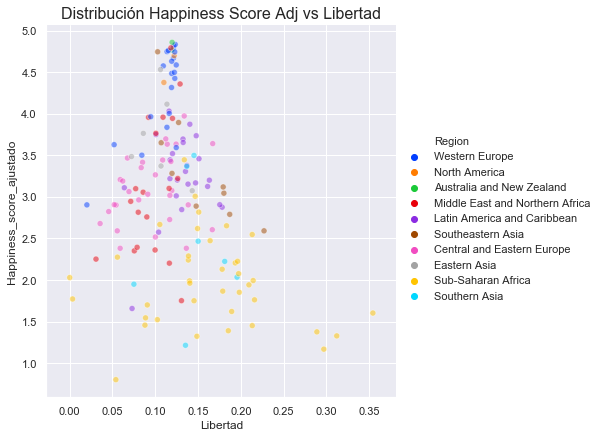

In [73]:
import seaborn as sns
sns.relplot(x="Libertad", y="Happiness_score_ajustado", hue="Region", alpha=.5, palette="bright",height=6, data=df)
plt.title('Distribución Happiness Score Adj vs Libertad',size=16)

Text(0.5, 1, 'Distribución Happiness Score Adj vs Familia')

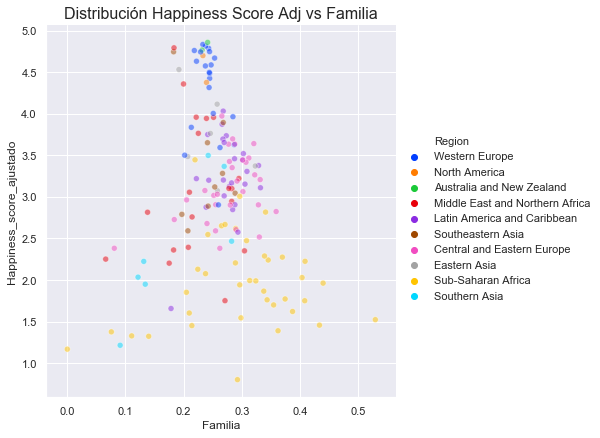

In [74]:
sns.relplot(x="Familia", y="Happiness_score_ajustado", hue="Region", alpha=.5, palette="bright",height=6, data=df)
plt.title('Distribución Happiness Score Adj vs Familia',size=16)

Text(0.5, 1.0, 'Boxplot Happiness Score Adj por región ')

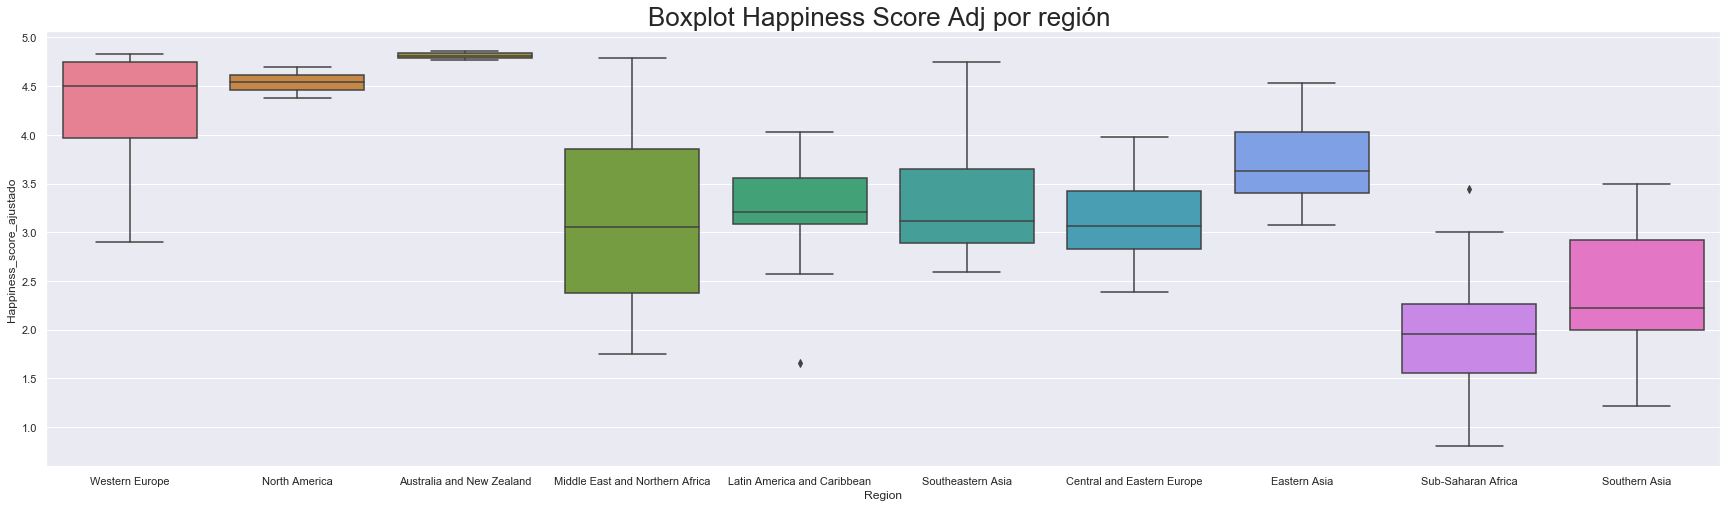

In [77]:
sns.set(rc={'figure.figsize':(30,8)})
sns.boxplot(x=df["Region"],y=df["Happiness_score_ajustado"],palette="husl")
plt.title('Boxplot Happiness Score Adj por región ',size=26)

In [78]:
y=df
y.drop(['Happiness_Score','Happiness_score_ajustado'],axis = 1, inplace= True)
y.mean()

Economia         0.300803
Familia          0.261692
Salud            0.178657
Libertad         0.125701
Transparencia    0.046032
Generosidad      0.087106
dtype: float64

Text(0.5, 1.0, 'Distribución de factores que influyen en Happiness Score')

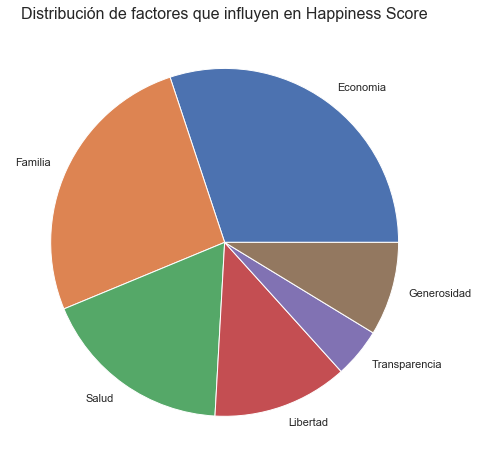

In [79]:
from matplotlib import pyplot as plt

p=y.mean()

var=['Economia','Familia','Salud','Libertad','Transparencia','Generosidad']

plt.pie(p,labels=var)
p
plt.title("Distribución de factores que influyen en Happiness Score",size=16)

Text(0.5, 1.0, 'Distribución de factores que influyen en Happiness Score en Latin America y Caribe')

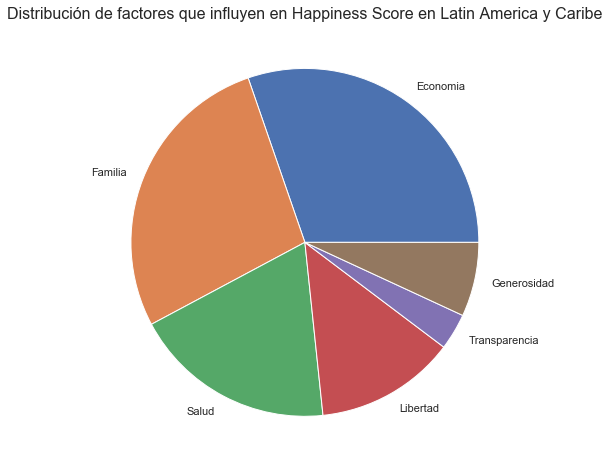

In [80]:
x=df[(df['Region'] == "Latin America and Caribbean")]
prom=x.mean()
plt.pie(prom,labels=var)
prom
plt.title("Distribución de factores que influyen en Happiness Score en Latin America y Caribe",size=16)

## Preguntas de interes
**¿Para que me puede servir las agrupaciones para la practica siguiente?**

Las agrupaciones son muy importantes ya que si en dado caso necesitamos cierta clase de datos separados de nuestro archivo de la base de datos original lo podemos realizar de manera sencilla y asi poder analizarlos de manera mas eficiente.  

**Importancia del analisis previo de los datos antes de iniciar las modificaciones**

Es importante ya que de esta manera nos damos cuenta como se comportan nuestros datos y cuales van a ser necesarios modificar, asi mismo notamos que tipo de modificaciones se realizaran para un futuro un analisis mas completo.